# Housekeeping

- excluding crystal 1 (c0) because results weren't good

# Setup Code

In [3]:
# Import Packages
import Pkg

Pkg.add("Plots")
Pkg.add("LsqFit")
Pkg.add("DelimitedFiles")
Pkg.add("PlotlyJS")  # optional if you later want interactive plots
Pkg.add("LaTeXStrings")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Scratch ─ v1.3.0
    Updating `~/Desktop/Research/Madurga/VITO-ENiGMA/Project.toml`
  [91a5bcdd] + Plots v1.40.14
    Updating `~/Desktop/Research/Madurga/VITO-ENiGMA/Manifest.toml`
  [66dad0bd] + AliasTables v1.1.3
  [34da2185] + Compat v4.16.0
  [d38c429a] + Contour v0.6.3
  [864edb3b] + DataStructures v0.18.22
  [c87230d0] + FFMPEG v0.4.2
  [1fa38f19] + Format v1.3.7
⌃ [28b8d3ca] + GR v0.73.10
  [42e2da0e] + Grisu v1.0.2
  [92d709cd] + IrrationalConstants v0.2.4
  [1019f520] + JLFzf v0.1.11
  [23fbe1c1] + Latexify v0.16.8
  [2ab3a3ac] + LogExpFunctions v0.3.29
  [442fdcdd] + Measures v0.3.2
  [e1d29d7a] + Missings v1.2.0
  [77ba4419] + NaNMath v1.1.3
  [ccf2f8ad] + PlotThemes v3.3.0
  [995b91a9] + PlotUtils v1.4.3
  [91a5bcdd] + Plots v1.40.14
  [43287f4e] + PtrArrays v1.3.0
  [3cdcf5f2] + RecipesBase v1.3.4
  [01d81517] + RecipesPipeline v0.6.12
  [05181044] + RelocatableFolder

In [4]:
using Plots,DelimitedFiles,LsqFit,LaTeXStrings

include("src/PhotoPeakFit.jl");

default(framestyle=:box,
        mc=:black,
        grid=false,
        guidefont=14,
        tickfont=12,
        lc=:navy,
        xlabel="Eᵧ (internal)",
        ylabel="counts")

In [7]:
kliterature = [564.79,
               586.01,
               2013.45]

3-element Vector{Float64}:
  564.79
  586.01
 2013.45

# importing efficiency calibrations
- copied from alexander (is this correct for this one as well?)

In [6]:
# Fit function is of the form 50^(p[1]+p[2]*log10(e)+p[3]*log10(e)^2)
io = open("calibrations/Eu152-efficiency-cal.csv", "r")
clover_eff_params = readdlm(io, ',', Float64, '\n', comments=true, comment_char='#')
close(io)

c0_eff_fit, c1_eff_fit, c2_eff_fit = clover_eff_params[1,:],clover_eff_params[2,:],clover_eff_params[3,:]

c0_eff_params,c1_eff_params,c2_eff_params = [c0_eff_fit[1],c0_eff_fit[3],c0_eff_fit[5]],
                                            [c1_eff_fit[1],c1_eff_fit[3],c1_eff_fit[5]],
                                            [c2_eff_fit[1],c2_eff_fit[3],c2_eff_fit[5]]

c0_σeff,c1_σeff,c2_σeff = [c0_eff_fit[2],c0_eff_fit[4],c0_eff_fit[6]], 
                          [c1_eff_fit[2],c1_eff_fit[4],c1_eff_fit[6]],
                          [c2_eff_fit[2],c2_eff_fit[4],c2_eff_fit[6]]

([0.04994475356378319, 0.03881764706440051, 0.0074349631904078745], [0.059208192080767955, 0.0466367978146129, 0.009090355673327628], [0.048188710602606065, 0.03712260347339793, 0.007054630479249403])

# Clover 0
- excluding crystal 0 as previously mentioned

## Crystal 1 (c0c1)

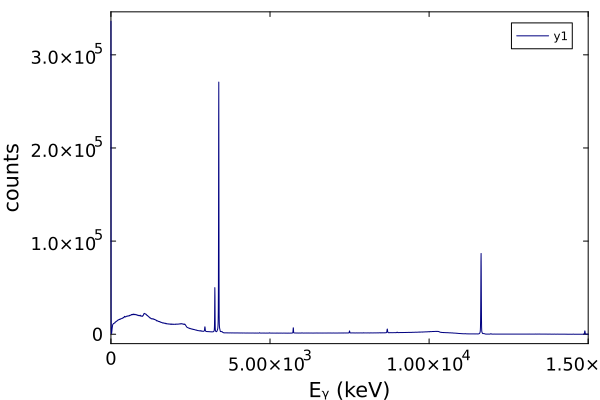

In [8]:
kc0c1 = readdlm("data/K47_T1_002_gamma_raw_ch01.txt",',')

# Plot uncalibrated histogram
plot(kc0c1[:,1],kc0c1[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)
- this doesn't look right (below) look at what needs to be adjusted

P1 = 17348.928916509234(20859.435474871047)
P2 = -4.291343766107889(6.386764250557782)
P3 = 617771.9823596926(11522.664017175523)
P4 = 3266.338843147066(0.09793039526835115)
P5 = 5.338228938740296(0.10352094136050152)
Calibrated - Expected = 2701.5488431470662 keV


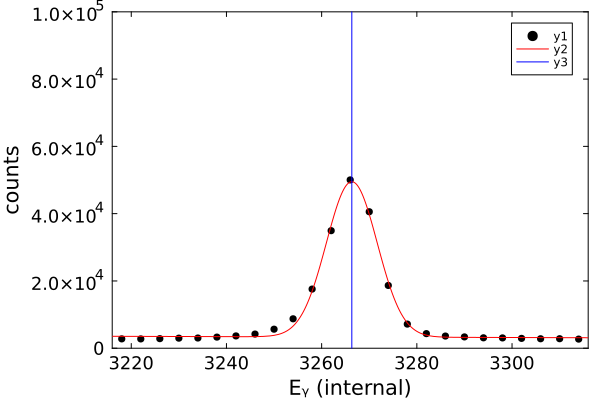

In [ ]:
c0c1_p1_mean = 3266

c0c1_x1low,c0c1_x1high=c0c1_p1_mean-50,c0c1_p1_mean+50; ylow,yhigh=0,1.0e5
c0c1_param1=[100,0.05,2e5,c0c1_p1_mean,1.0]
    # deos anything here need to be changed/adjusted (how so?)

c0c1_p1,c0c1_s1,f=PhotopeakFit.gaussianfit(kc0c1,c0c1_x1low,c0c1_x1high,c0c1_param1)

for (i,val) in enumerate(c0c1_p1)
    println("P$i = ",val,"($(c0c1_s1[i]))")
end
println("Calibrated - Expected = $(c0c1_p1[4] - kliterature[1]) keV")

scatter(kc0c1[:,1],kc0c1[:,2],xlims=(c0c1_x1low,c0c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c1_p1),c0c1_x1low,c0c1_x1high,lc=:red)
vline!([c0c1_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = 115511.80356403906(20859.435474871047)
P2 = -31.925004491970203(6.386764250557782)
P3 = 3.534304166374545e6(11522.664017175523)
P4 = 3388.9053801128643(0.09793039526835115)
P5 = 5.3777033453166725(0.10352094136050152)
Calibrated - Expected = 2802.8953801128646 keV


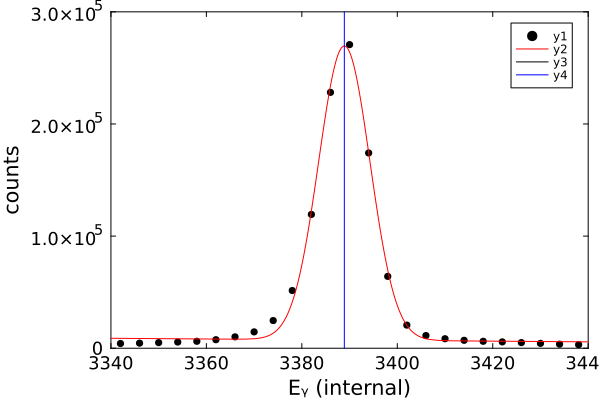

In [26]:
c0c1_p2_mean = 3390
c0c1_x1low,c0c1_x1high=c0c1_p2_mean-50,c0c1_p2_mean+50; ylow,yhigh=0,300000
c0c1_param1=[100,0.05,2e5,c0c1_p2_mean,1.0]

c0c1_p2,c0c1_s2,f=PhotopeakFit.gaussianfit(kc0c1,c0c1_x1low,c0c1_x1high,c0c1_param1)

for (i,val) in enumerate(c0c1_p2)
    println("P$i = ",val,"($(c0c1_s1[i]))")
end
println("Calibrated - Expected = $(c0c1_p2[4] - kliterature[2]) keV")

scatter(kc0c1[:,1],kc0c1[:,2],xlims=(c0c1_x1low,c0c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c1_p2),c0c1_x1low,c0c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c1_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = 108624.25299939334(20859.435474871047)
P2 = -9.160473432349875(6.386764250557782)
P3 = 1.5311214912627367e6(11522.664017175523)
P4 = 11633.127149204918(0.09793039526835115)
P5 = 7.245593737848264(0.10352094136050152)
Calibrated - Expected = 9619.677149204917 keV


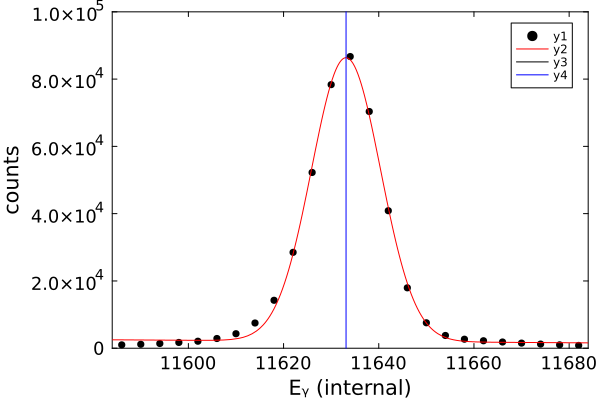

In [27]:
c0c1_p3_mean = 11634
c0c1_x1low,c0c1_x1high=c0c1_p3_mean-50,c0c1_p3_mean+50; ylow,yhigh=0,1e5
c0c1_param1=[100,0.05,2e5,c0c1_p3_mean,1.0]

c0c1_p3,c0c1_s3,f=PhotopeakFit.gaussianfit(kc0c1,c0c1_x1low,c0c1_x1high,c0c1_param1)

for (i,val) in enumerate(c0c1_p3)
    println("P$i = ",val,"($(c0c1_s1[i]))")
end
println("Calibrated - Expected = $(c0c1_p3[4] - kliterature[3]) keV")

scatter(kc0c1[:,1],kc0c1[:,2],xlims=(c0c1_x1low,c0c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c1_p3),c0c1_x1low,c0c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c1_p3[4]],lc=:blue)

## Crystal 2 (c0c2)

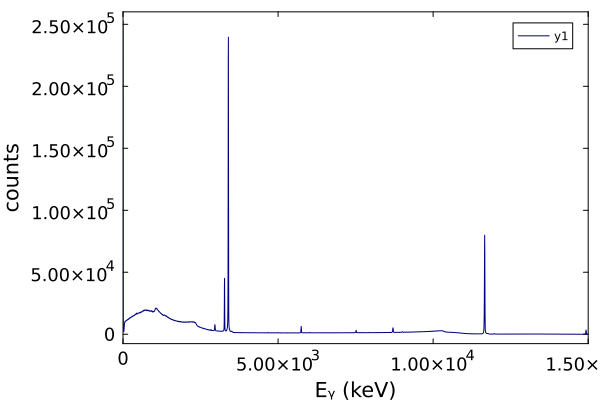

In [28]:
kc0c2 = readdlm("data/K47_T1_002_gamma_raw_ch02.txt",',')

# Plot uncalibrated histogram
plot(kc0c2[:,1],kc0c2[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1

P1 = 12430.531354433926(13984.255197372391)
P2 = -2.8542181204726598(4.270471753835801)
P3 = 542017.877199209(7439.23411640815)
P4 = 3272.7321431990204(0.06899958542137057)
P5 = 5.067253620807292(0.07272371946152743)
Calibrated - Expected = 2707.9421431990204 keV


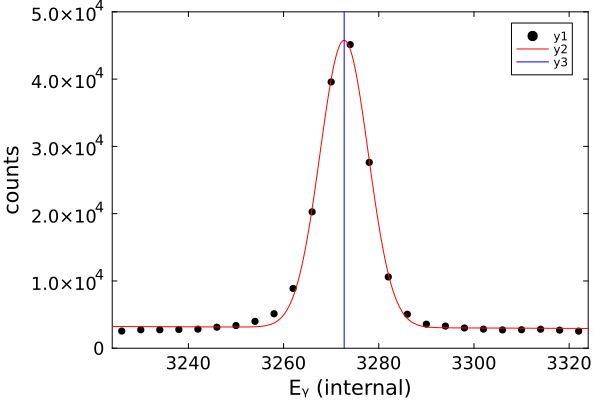

In [35]:
c0c2_p1_mean = 3274
c0c2_x1low,c0c2_x1high=c0c2_p1_mean-50,c0c2_p1_mean+50; ylow,yhigh=0,5e4
c0c2_param1=[100,0.05,2e5,c0c2_p1_mean,1.0]

c0c2_p1,c0c2_s1,f=PhotopeakFit.gaussianfit(kc0c2,c0c2_x1low,c0c2_x1high,c0c2_param1)

for (i,val) in enumerate(c0c2_p1)
    println("P$i = ",val,"($(c0c2_s1[i]))")
end
println("Calibrated - Expected = $(c0c2_p1[4] - kliterature[1]) keV")

scatter(kc0c2[:,1],kc0c2[:,2],xlims=(c0c2_x1low,c0c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c2_p1),c0c2_x1low,c0c2_x1high,lc=:red)
vline!([c0c2_p1[4]],lc=:blue)

### Peak 2

P1 = 115764.59186386762(13984.255197372391)
P2 = -32.15376701018779(4.270471753835801)
P3 = 3.103862843675101e6(7439.23411640815)
P4 = 3396.247198777351(0.06899958542137057)
P5 = 5.12024586317851(0.07272371946152743)
Calibrated - Expected = 2810.2371987773513 keV


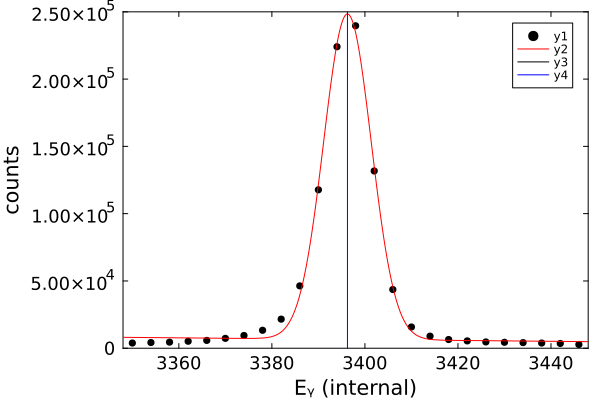

In [36]:
c0c2_p2_mean = 3398
c0c2_x1low,c0c2_x1high=c0c2_p2_mean-50,c0c2_p2_mean+50; ylow,yhigh=0,2.5e5
c0c2_param1=[100,0.05,2e5,c0c2_p2_mean,1.0]

c0c2_p2,c0c2_s2,f=PhotopeakFit.gaussianfit(kc0c2,c0c2_x1low,c0c2_x1high,c0c2_param1)

for (i,val) in enumerate(c0c2_p2)
    println("P$i = ",val,"($(c0c2_s1[i]))")
end
println("Calibrated - Expected = $(c0c2_p2[4] - kliterature[2]) keV")

scatter(kc0c2[:,1],kc0c2[:,2],xlims=(c0c2_x1low,c0c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c2_p2),c0c2_x1low,c0c2_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c2_p2[4]],lc=:blue)

### Peak 3

P1 = 192627.368694363(13984.255197372391)
P2 = -16.34240946737826(4.270471753835801)
P3 = 1.4181850514323295e6(7439.23411640815)
P4 = 11661.66019135853(0.06899958542137057)
P5 = 7.395959058114737(0.07272371946152743)
Calibrated - Expected = 9648.210191358528 keV


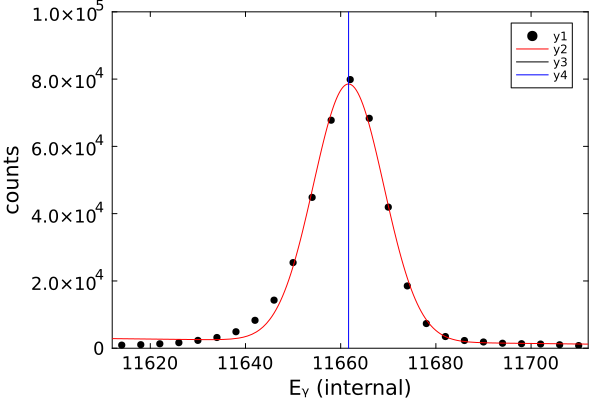

In [37]:
c0c2_p3_mean = 11662
c0c2_x1low,c0c2_x1high=c0c2_p3_mean-50,c0c2_p3_mean+50; ylow,yhigh=0,1e5
c0c2_param1=[100,0.05,2e5,c0c2_p3_mean,1.0]

c0c2_p3,c0c2_s3,f=PhotopeakFit.gaussianfit(kc0c2,c0c2_x1low,c0c2_x1high,c0c2_param1)

for (i,val) in enumerate(c0c2_p3)
    println("P$i = ",val,"($(c0c2_s1[i]))")
end
println("Calibrated - Expected = $(c0c2_p3[4] - kliterature[3]) keV")

scatter(kc0c2[:,1],kc0c2[:,2],xlims=(c0c2_x1low,c0c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c2_p3),c0c2_x1low,c0c2_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c2_p3[4]],lc=:blue)

## Crystal 3 (c0c3)

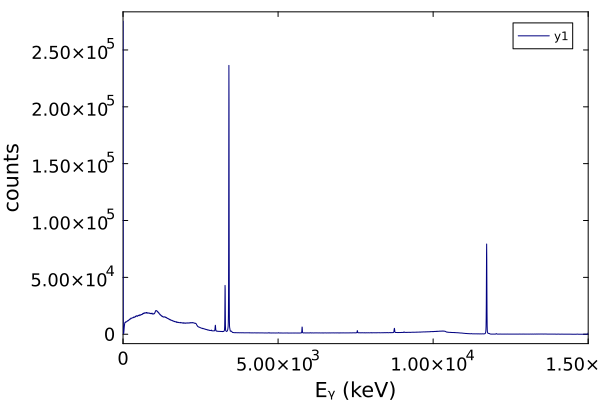

In [62]:
kc0c3 = readdlm("data/K47_T1_002_gamma_raw_ch03.txt",',') 

# Plot uncalibrated histogram
plot(kc0c3[:,1],kc0c3[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = 12472.78721020553(14751.530192541322)
P2 = -2.8957575521269674(4.484146055851819)
P3 = 569449.5136292194(8337.189682516291)
P4 = 3291.1126518044416(0.0796608047982855)
P5 = 5.5784984299408515(0.08445485099858936)
Calibrated - Expected = 2726.3226518044416 keV


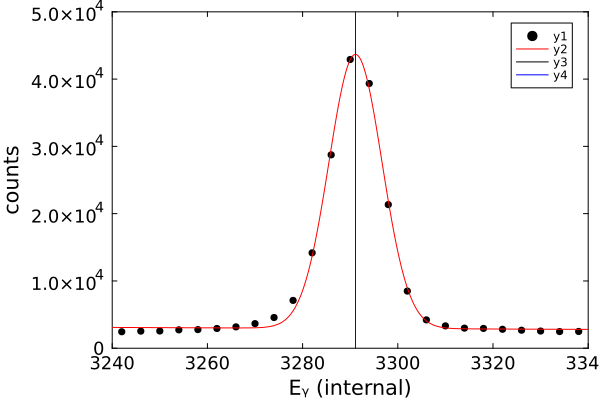

In [63]:
c0c3_p1_mean = 3290
c0c3_x1low,c0c3_x1high=c0c3_p1_mean-50,c0c3_p1_mean+50; ylow,yhigh=0,5e4
c0c3_param1=[100,0.05,2e5,c0c3_p1_mean,1.0]

c0c3_p1,c0c3_s1,f=PhotopeakFit.gaussianfit(kc0c3,c0c3_x1low,c0c3_x1high,c0c3_param1)

for (i,val) in enumerate(c0c3_p1)
    println("P$i = ",val,"($(c0c3_s1[i]))")
end
println("Calibrated - Expected = $(c0c3_p1[4] - kliterature[1]) keV")

scatter(kc0c3[:,1],kc0c3[:,2],xlims=(c0c3_x1low,c0c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c3_p1),c0c3_x1low,c0c3_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c3_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = 84142.44249131573(14751.530192541322)
P2 = -22.96523234558515(4.484146055851819)
P3 = 3.243954073651383e6(8337.189682516291)
P4 = 3414.6991576579944(0.0796608047982855)
P5 = 5.6148369249421215(0.08445485099858936)
Calibrated - Expected = 2828.6891576579947 keV


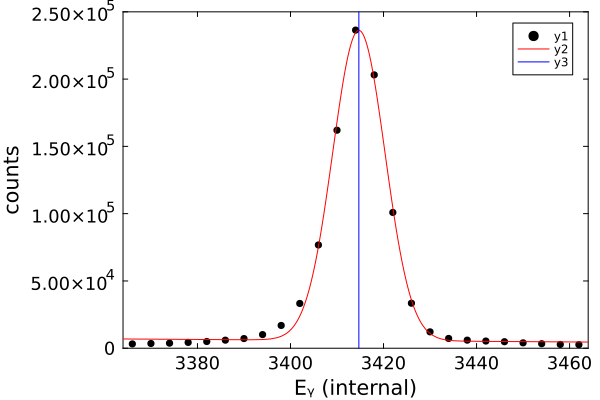

In [64]:
c0c3_p2_mean = 3414
c0c3_x1low,c0c3_x1high=c0c3_p2_mean-50,c0c3_p2_mean+50; ylow,yhigh=0,2.5e5
c0c3_param1=[100,0.05,2e5,c0c3_p2_mean,1.0]

c0c3_p2,c0c3_s2,f=PhotopeakFit.gaussianfit(kc0c3,c0c3_x1low,c0c3_x1high,c0c3_param1)

for (i,val) in enumerate(c0c3_p2)
    println("P$i = ",val,"($(c0c3_s1[i]))")
end
println("Calibrated - Expected = $(c0c3_p2[4] - kliterature[2]) keV")

scatter(kc0c3[:,1],kc0c3[:,2],xlims=(c0c3_x1low,c0c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c3_p2),c0c3_x1low,c0c3_x1high,lc=:red)
vline!([c0c3_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = 85458.70829019428(14751.530192541322)
P2 = -7.152954671701756(4.484146055851819)
P3 = 1.4492558190466915e6(8337.189682516291)
P4 = 11725.335751384478(0.0796608047982855)
P5 = 7.507523272279082(0.08445485099858936)
Calibrated - Expected = 9711.885751384478 keV


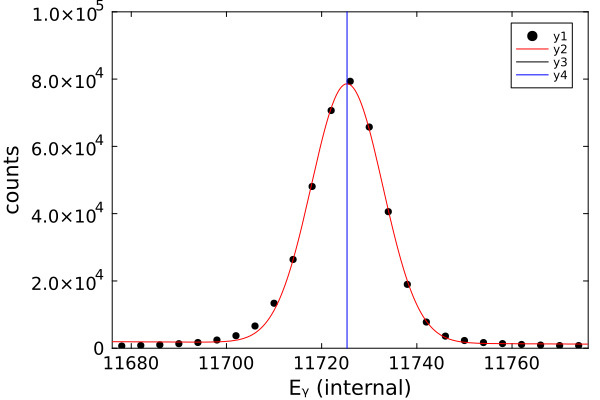

In [65]:
c0c3_p3_mean = 11726
c0c3_x1low,c0c3_x1high=c0c3_p3_mean-50,c0c3_p3_mean+50; ylow,yhigh=0,1e5
c0c3_param1=[100,0.05,2e5,c0c3_p3_mean,1.0]

c0c3_p3,c0c3_s3,f=PhotopeakFit.gaussianfit(kc0c3,c0c3_x1low,c0c3_x1high,c0c3_param1)

for (i,val) in enumerate(c0c3_p3)
    println("P$i = ",val,"($(c0c3_s1[i]))")
end
println("Calibrated - Expected = $(c0c3_p3[4] - kliterature[3]) keV")

scatter(kc0c3[:,1],kc0c3[:,2],xlims=(c0c3_x1low,c0c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c3_p3),c0c3_x1low,c0c3_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c3_p3[4]],lc=:blue)

## Clover 0 Areas

Do these numbers look right?

In [66]:
c0_areas = [(c0c1_p1[3] + c0c2_p1[3] + c0c3_p1[3]), 
            (c0c1_p2[3] + c0c2_p2[3] + c0c3_p2[3]), 
            (c0c1_p3[3] + c0c2_p3[3] + c0c3_p3[3])]

c0_σareas = [(c0c1_s1[3]^2 + c0c2_s1[3]^2 + c0c3_s1[3]^2)^(1/2),
             (c0c1_s2[3]^2 + c0c2_s2[3]^2 + c0c3_s2[3]^2)^(1/2),
             (c0c1_s3[3]^2 + c0c2_s3[3]^2 + c0c3_s3[3]^2)^(1/2)]

3-element Vector{Float64}:
 16050.629959403417
 93756.90047874278
 39184.186824577744

# Clover 1

## Crystal 4 (c1c0)

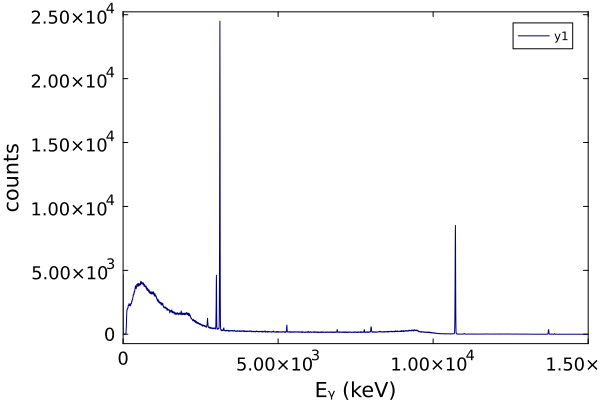

In [72]:
kc1c0 = readdlm("data/K47_T1_002_gamma_raw_ch04.txt",',') 

# Plot uncalibrated histogram
plot(kc1c0[:,1],kc1c0[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = 4004.0148517917337(2996.860792619976)
P2 = -1.1797015810899096(0.9953502237388301)
P3 = 62796.69072888586(1978.9567362281782)
P4 = 3008.6387685800796(0.18508245001929088)
P5 = 6.139321025526241(0.19754096842627852)
Calibrated - Expected = 2443.8487685800796 keV


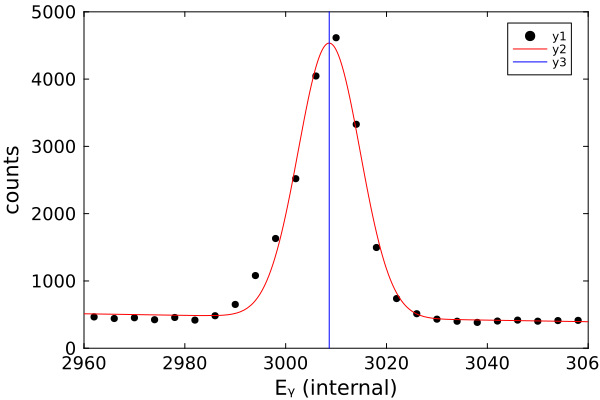

In [73]:
c1c0_p1_mean = 3010
c1c0_x1low,c1c0_x1high=c1c0_p1_mean-50,c1c0_p1_mean+50; ylow,yhigh=0,5e3
c1c0_param1=[100,0.05,2e5,c1c0_p1_mean,1.0]

c1c0_p1,c1c0_s1,f=PhotopeakFit.gaussianfit(kc1c0,c1c0_x1low,c1c0_x1high,c1c0_param1)

for (i,val) in enumerate(c1c0_p1)
    println("P$i = ",val,"($(c1c0_s1[i]))")
end
println("Calibrated - Expected = $(c1c0_p1[4] - kliterature[1]) keV")

scatter(kc1c0[:,1],kc1c0[:,2],xlims=(c1c0_x1low,c1c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c0_p1),c1c0_x1low,c1c0_x1high,lc=:red)
vline!([c1c0_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = 15710.683550253894(2996.860792619976)
P2 = -4.849778910221254(0.9953502237388301)
P3 = 358228.6207456074(1978.9567362281782)
P4 = 3121.4174826286085(0.18508245001929088)
P5 = 6.215473621689367(0.19754096842627852)
Calibrated - Expected = 2535.4074826286087 keV


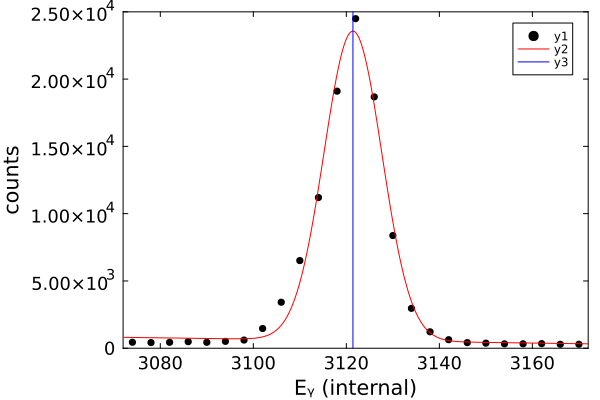

In [74]:
c1c0_p2_mean = 3122
c1c0_x1low,c1c0_x1high=c1c0_p2_mean-50,c1c0_p2_mean+50; ylow,yhigh=0,2.5e4
c1c0_param1=[100,0.05,2e5,c1c0_p2_mean,1.0]

c1c0_p2,c1c0_s2,f=PhotopeakFit.gaussianfit(kc1c0,c1c0_x1low,c1c0_x1high,c1c0_param1)

for (i,val) in enumerate(c1c0_p2)
    println("P$i = ",val,"($(c1c0_s1[i]))")
end
println("Calibrated - Expected = $(c1c0_p2[4] - kliterature[2]) keV")

scatter(kc1c0[:,1],kc1c0[:,2],xlims=(c1c0_x1low,c1c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c0_p2),c1c0_x1low,c1c0_x1high,lc=:red)
vline!([c1c0_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = 14640.17318323794(2996.860792619976)
P2 = -1.3587240198753998(0.9953502237388301)
P3 = 164807.0862090615(1978.9567362281782)
P4 = 10716.506410321515(0.18508245001929088)
P5 = 7.805779038522974(0.19754096842627852)
Calibrated - Expected = 8703.056410321515 keV


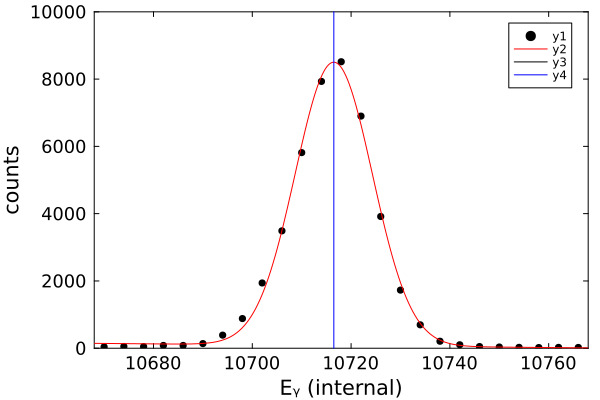

In [75]:
c1c0_p3_mean = 10718
c1c0_x1low,c1c0_x1high=c1c0_p3_mean-50,c1c0_p3_mean+50; ylow,yhigh=0,1e4
c1c0_param1=[100,0.05,2e5,c1c0_p3_mean,1.0]

c1c0_p3,c1c0_s3,f=PhotopeakFit.gaussianfit(kc1c0,c1c0_x1low,c1c0_x1high,c1c0_param1)

for (i,val) in enumerate(c1c0_p3)
    println("P$i = ",val,"($(c1c0_s1[i]))")
end
println("Calibrated - Expected = $(c1c0_p3[4] - kliterature[3]) keV")

scatter(kc1c0[:,1],kc1c0[:,2],xlims=(c1c0_x1low,c1c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c0_p3),c1c0_x1low,c1c0_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c1c0_p3[4]],lc=:blue)

## Crystal 5 (c1c1)

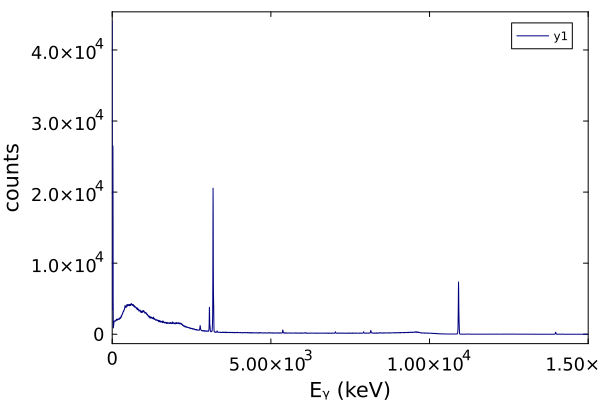

In [78]:
kc1c1 = readdlm("data/K47_T1_002_gamma_raw_ch05.txt",',') 

# Plot uncalibrated histogram
plot(kc1c1[:,1],kc1c1[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = -684.7538112884022(4414.021472985871)
P2 = 0.38706911218207046(1.4391507583929701)
P3 = 52851.99133385116(2995.802076649753)
P4 = 3064.3153681052963(0.34971052478424314)
P5 = 6.543140146084292(0.37512266823314544)
Calibrated - Expected = 2499.5253681052964 keV


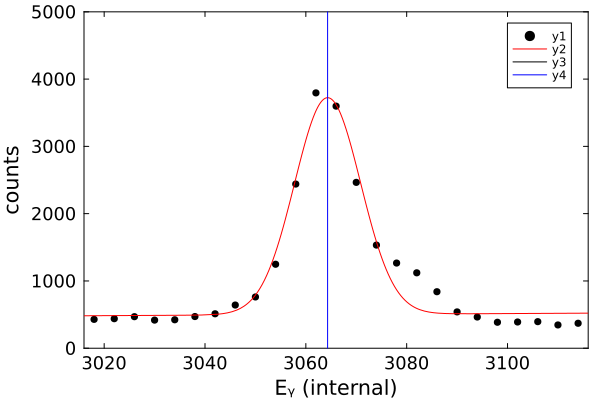

In [79]:
c1c1_p1_mean = 3066
c1c1_x1low,c1c1_x1high=c1c1_p1_mean-50,c1c1_p1_mean+50; ylow,yhigh=0,5e3
c1c1_param1=[100,0.05,2e5,c1c1_p1_mean,1.0]

c1c1_p1,c1c1_s1,f=PhotopeakFit.gaussianfit(kc1c1,c1c1_x1low,c1c1_x1high,c1c1_param1)

for (i,val) in enumerate(c1c1_p1)
    println("P$i = ",val,"($(c1c1_s1[i]))")
end
println("Calibrated - Expected = $(c1c1_p1[4] - kliterature[1]) keV")

scatter(kc1c1[:,1],kc1c1[:,2],xlims=(c1c1_x1low,c1c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c1_p1),c1c1_x1low,c1c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c1c1_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = -17987.31588617283(4414.021472985871)
P2 = 5.963848295406207(1.4391507583929701)
P3 = 298960.60033719183(2995.802076649753)
P4 = 3178.9681002166035(0.34971052478424314)
P5 = 6.398487916411303(0.37512266823314544)
Calibrated - Expected = 2592.9581002166033 keV


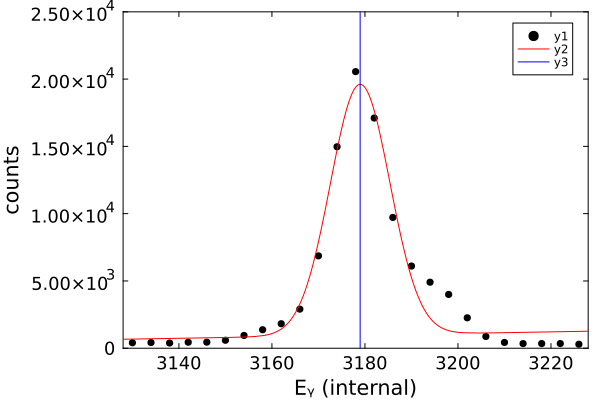

In [80]:
c1c1_p2_mean = 3178
c1c1_x1low,c1c1_x1high=c1c1_p2_mean-50,c1c1_p2_mean+50; ylow,yhigh=0,2.5e4
c1c1_param1=[100,0.05,2e5,c1c1_p2_mean,1.0]

c1c1_p2,c1c1_s2,f=PhotopeakFit.gaussianfit(kc1c1,c1c1_x1low,c1c1_x1high,c1c1_param1)

for (i,val) in enumerate(c1c1_p2)
    println("P$i = ",val,"($(c1c1_s1[i]))")
end
println("Calibrated - Expected = $(c1c1_p2[4] - kliterature[2]) keV")

scatter(kc1c1[:,1],kc1c1[:,2],xlims=(c1c1_x1low,c1c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c1_p2),c1c1_x1low,c1c1_x1high,lc=:red)
vline!([c1c1_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = -20001.02237298858(4414.021472985871)
P2 = 1.849223304530289(1.4391507583929701)
P3 = 148523.92378390813(2995.802076649753)
P4 = 10914.714124991544(0.34971052478424314)
P5 = 8.681204093351447(0.37512266823314544)
Calibrated - Expected = 8901.264124991543 keV


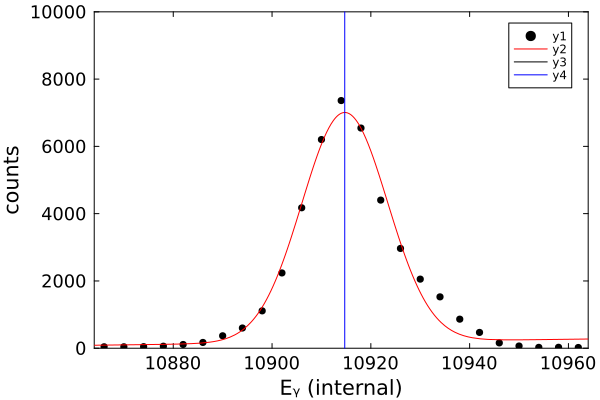

In [81]:
c1c1_p3_mean = 10914
c1c1_x1low,c1c1_x1high=c1c1_p3_mean-50,c1c1_p3_mean+50; ylow,yhigh=0,1e4
c1c1_param1=[100,0.05,2e5,c1c1_p3_mean,1.0]

c1c1_p3,c1c1_s3,f=PhotopeakFit.gaussianfit(kc1c1,c1c1_x1low,c1c1_x1high,c1c1_param1)

for (i,val) in enumerate(c1c1_p3)
    println("P$i = ",val,"($(c1c1_s1[i]))")
end
println("Calibrated - Expected = $(c1c1_p3[4] - kliterature[3]) keV")

scatter(kc1c1[:,1],kc1c1[:,2],xlims=(c1c1_x1low,c1c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c1_p3),c1c1_x1low,c1c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c1c1_p3[4]],lc=:blue)

## Crystal 6 (c1c2)

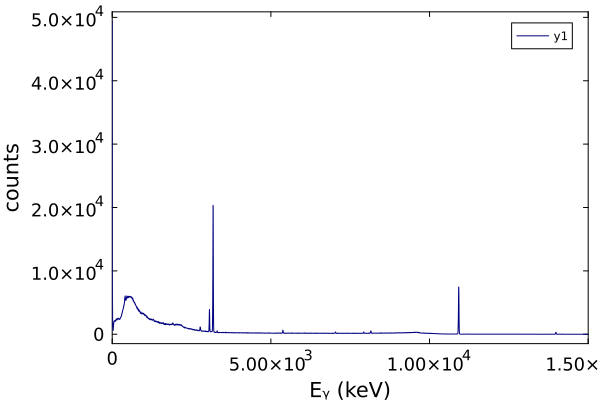

In [82]:
kc1c2 = readdlm("data/K47_T1_002_gamma_raw_ch06.txt",',') 

# Plot uncalibrated histogram
plot(kc1c2[:,1],kc1c2[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = 2403.7256499180294(1807.0524352456068)
P2 = -0.6455294219074611(0.5891484016000027)
P3 = 58306.755765030364(1238.7821813963353)
P4 = 3064.120767471074(0.13243473621933421)
P5 = 6.633549621333842(0.1422288977279952)
Calibrated - Expected = 2499.330767471074 keV


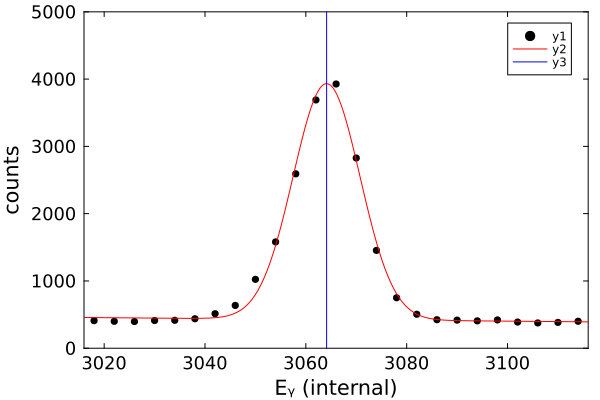

In [83]:
c1c2_p1_mean = 3066
c1c2_x1low,c1c2_x1high=c1c2_p1_mean-50,c1c2_p1_mean+50; ylow,yhigh=0,5e3
c1c2_param1=[100,0.05,2e5,c1c2_p1_mean,5]

c1c2_p1,c1c2_s1,f=PhotopeakFit.gaussianfit(kc1c2,c1c2_x1low,c1c2_x1high,c1c2_param1)

for (i,val) in enumerate(c1c2_p1)
    println("P$i = ",val,"($(c1c2_s1[i]))")
end
println("Calibrated - Expected = $(c1c2_p1[4] - kliterature[1]) keV")

scatter(kc1c2[:,1],kc1c2[:,2],xlims=(c1c2_x1low,c1c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c2_p1),c1c2_x1low,c1c2_x1high,lc=:red)
vline!([c1c2_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = 11320.391591848(1807.0524352456068)
P2 = -3.4066221201460527(0.5891484016000027)
P3 = 338341.3505976371(1238.7821813963353)
P4 = 3179.2628399099885(0.13243473621933421)
P5 = 6.6606372205824025(0.1422288977279952)
Calibrated - Expected = 2593.2528399099883 keV


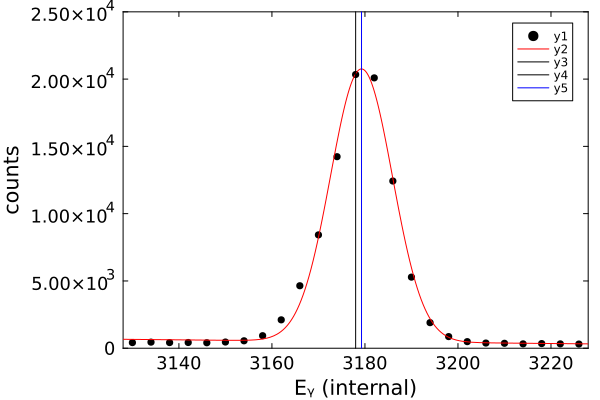

In [84]:
c1c2_p2_mean = 3178
c1c2_x1low,c1c2_x1high=c1c2_p2_mean-50,c1c2_p2_mean+50; ylow,yhigh=0,2.5e4
c1c2_param1=[100,0.05,2e5,c1c2_p2_mean,1.0]

c1c2_p2,c1c2_s2,f=PhotopeakFit.gaussianfit(kc1c2,c1c2_x1low,c1c2_x1high,c1c2_param1)

for (i,val) in enumerate(c1c2_p2)
    println("P$i = ",val,"($(c1c2_s1[i]))")
end
println("Calibrated - Expected = $(c1c2_p2[4] - kliterature[2]) keV")

scatter(kc1c2[:,1],kc1c2[:,2],xlims=(c1c2_x1low,c1c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c2_p2),c1c2_x1low,c1c2_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c1c2_p2_mean],lc=:black)
vline!([c1c2_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = 14969.642474279211(1807.0524352456068)
P2 = -1.3638805403692946(0.5891484016000027)
P3 = 155018.07909038867(1238.7821813963353)
P4 = 10919.905914222312(0.13243473621933421)
P5 = 8.221559990881413(0.1422288977279952)
Calibrated - Expected = 8906.455914222312 keV


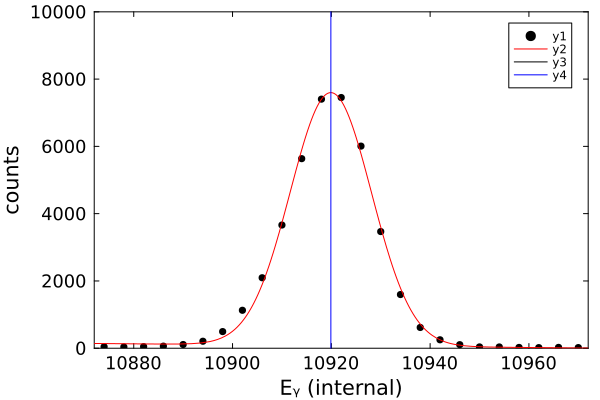

In [85]:
c1c2_p3_mean = 10922
c1c2_x1low,c1c2_x1high=c1c2_p3_mean-50,c1c2_p3_mean+50; ylow,yhigh=0,1e4
c1c2_param1=[100,0.05,2e5,c1c2_p3_mean,1.0]

c1c2_p3,c1c2_s3,f=PhotopeakFit.gaussianfit(kc1c2,c1c2_x1low,c1c2_x1high,c1c2_param1)

for (i,val) in enumerate(c1c2_p3)
    println("P$i = ",val,"($(c1c2_s1[i]))")
end
println("Calibrated - Expected = $(c1c2_p3[4] - kliterature[3]) keV")

scatter(kc1c2[:,1],kc1c2[:,2],xlims=(c1c2_x1low,c1c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c2_p3),c1c2_x1low,c1c2_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c1c2_p3[4]],lc=:blue)

## Crystal 7 (c1c3)

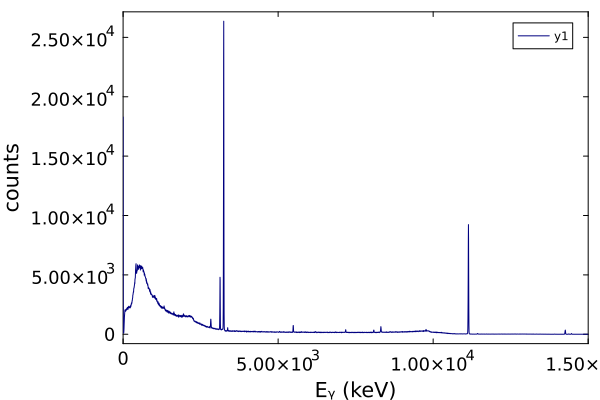

In [50]:
kc1c3 = readdlm("data/K47_T1_002_gamma_raw_ch07.txt",',') 

# Plot uncalibrated histogram
plot(kc1c3[:,1],kc1c3[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = 2626.071769621297(1909.792041044883)
P2 = -0.7067372845447684(0.6110016127157019)
P3 = 62610.89818656488(1127.5979529630654)
P4 = 3127.230976464483(0.09712632689972076)
P5 = 5.51847385967717(0.10290225980174525)
Calibrated - Expected = 2562.440976464483 keV


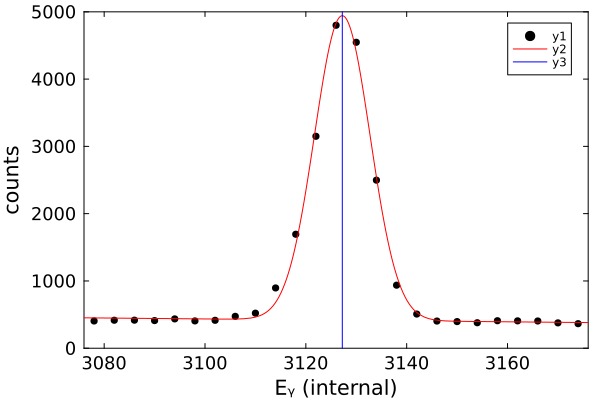

In [86]:
c1c3_p1_mean = 3126
c1c3_x1low,c1c3_x1high=c1c3_p1_mean-50,c1c3_p1_mean+50; ylow,yhigh=0,5e3
c1c3_param1=[100,0.05,2e5,c1c3_p1_mean,5.0]

c1c3_p1,c1c3_s1,f=PhotopeakFit.gaussianfit(kc1c3,c1c3_x1low,c1c3_x1high,c1c3_param1)

for (i,val) in enumerate(c1c3_p1)
    println("P$i = ",val,"($(c1c3_s1[i]))")
end
println("Calibrated - Expected = $(c1c3_p1[4] - kliterature[1]) keV")

scatter(kc1c3[:,1],kc1c3[:,2],xlims=(c1c3_x1low,c1c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c3_p1),c1c3_x1low,c1c3_x1high,lc=:red)
vline!([c1c3_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = 11299.177986915245(1909.792041044883)
P2 = -3.3353040487552246(0.6110016127157019)
P3 = 360989.89553442143(1127.5979529630654)
P4 = 3244.7044327038884(0.09712632689972076)
P5 = 5.560464442907079(0.10290225980174525)
Calibrated - Expected = 2658.694432703888 keV


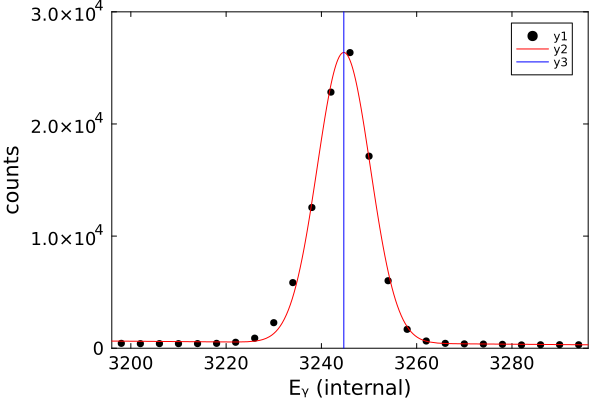

In [87]:
c1c3_p2_mean = 3246
c1c3_x1low,c1c3_x1high=c1c3_p2_mean-50,c1c3_p2_mean+50; ylow,yhigh=0,30000
c1c3_param1=[100,0.05,2e5,c1c3_p2_mean,5.0]

c1c3_p2,c1c3_s2,f=PhotopeakFit.gaussianfit(kc1c3,c1c3_x1low,c1c3_x1high,c1c3_param1)

for (i,val) in enumerate(c1c3_p2)
    println("P$i = ",val,"($(c1c3_s1[i]))")
end
println("Calibrated - Expected = $(c1c3_p2[4] - kliterature[2]) keV")

scatter(kc1c3[:,1],kc1c3[:,2],xlims=(c1c3_x1low,c1c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c3_p2),c1c3_x1low,c1c3_x1high,lc=:red)
vline!([c1c3_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = 10917.35108998356(1909.792041044883)
P2 = -0.9742708469250541(0.6110016127157019)
P3 = 166487.7603074887(1127.5979529630654)
P4 = 11137.86586001425(0.09712632689972076)
P5 = 7.3006768130382325(0.10290225980174525)
Calibrated - Expected = 9124.41586001425 keV


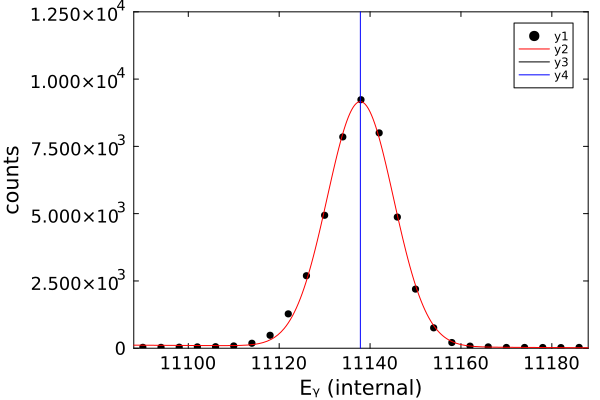

In [88]:
c1c3_p3_mean = 11138
c1c3_x1low,c1c3_x1high=c1c3_p3_mean-50,c1c3_p3_mean+50; ylow,yhigh=0,1.25e4
c1c3_param1=[100,0.05,2e5,c1c3_p3_mean,5.0]

c1c3_p3,c1c3_s3,f=PhotopeakFit.gaussianfit(kc1c3,c1c3_x1low,c1c3_x1high,c1c3_param1)

for (i,val) in enumerate(c1c3_p3)
    println("P$i = ",val,"($(c1c3_s1[i]))")
end
println("Calibrated - Expected = $(c1c3_p3[4] - kliterature[3]) keV")

scatter(kc1c3[:,1],kc1c3[:,2],xlims=(c1c3_x1low,c1c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c3_p3),c1c3_x1low,c1c3_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c1c3_p3[4]],lc=:blue)

## Clover 1 Areas

In [89]:
c1_areas = [(c1c0_p1[3] + c1c1_p1[3] + c1c2_p1[3] + c1c3_p1[3]), 
            (c1c0_p2[3] + c1c1_p2[3] + c1c2_p2[3] + c1c3_p2[3]), 
            (c1c0_p3[3] + c1c1_p3[3] + c1c2_p3[3] + c1c3_p3[3])]

c1_σareas = [(c1c0_s1[3]^2 + c1c1_s1[3]^2 + c1c2_s1[3]^2 + c1c3_s1[3]^2)^(1/2),
             (c1c0_s2[3]^2 + c1c1_s2[3]^2 + c1c2_s2[3]^2 + c1c3_s2[3]^2)^(1/2),
             (c1c0_s3[3]^2 + c1c1_s3[3]^2 + c1c2_s3[3]^2 + c1c3_s3[3]^2)^(1/2)]

3-element Vector{Float64}:
  3961.9639426417566
 21960.829776956114
  6969.598277971881

# Clover 2

## Crystal 8 (c2c0)

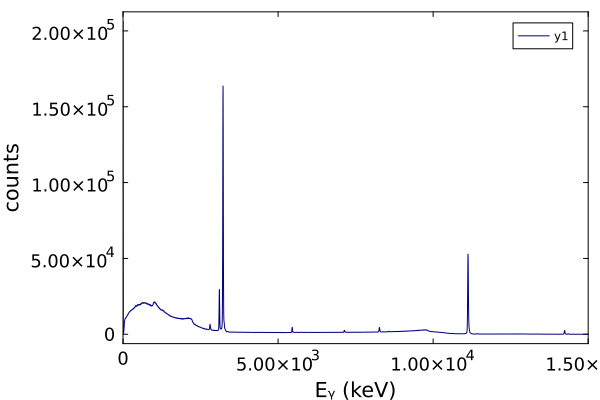

In [51]:
kc2c0 = readdlm("data/K47_T1_002_gamma_raw_ch08.txt",',') 

# Plot uncalibrated histogram
plot(kc2c0[:,1],kc2c0[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = -33656.49843649187(4525.559445205787)
P2 = 11.86881895101887(1.4573734042060773)
P3 = 579734.6827589195(3792.8644074203767)
P4 = 3107.101721976408(0.04959763160066935)
P5 = 8.70981237608229(0.054686769762921895)
Calibrated - Expected = 2542.311721976408 keV


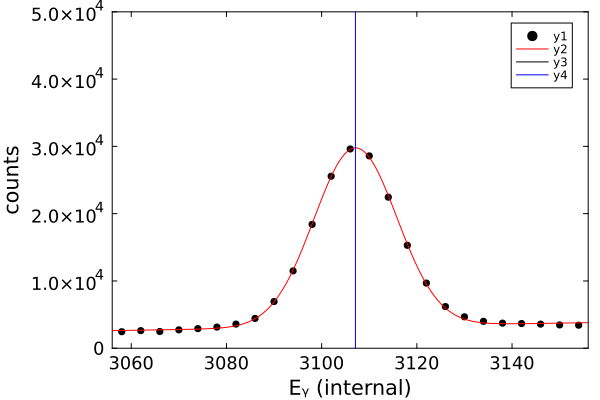

In [90]:
c2c0_p1_mean = 3106
c2c0_x1low,c2c0_x1high=c2c0_p1_mean-50,c2c0_p1_mean+50; ylow,yhigh=0,5e4
c2c0_param1=[100,0.05,2e5,c2c0_p1_mean,5.0]

c2c0_p1,c2c0_s1,f=PhotopeakFit.gaussianfit(kc2c0,c2c0_x1low,c2c0_x1high,c2c0_param1)

for (i,val) in enumerate(c2c0_p1)
    println("P$i = ",val,"($(c2c0_s1[i]))")
end
println("Calibrated - Expected = $(c2c0_p1[4] - kliterature[1]) keV")

scatter(kc2c0[:,1],kc2c0[:,2],xlims=(c2c0_x1low,c2c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c0_p1),c2c0_x1low,c2c0_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c2c0_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = -71184.96176235388(4525.559445205787)
P2 = 24.087391890901078(1.4573734042060773)
P3 = 3.3270435624986226e6(3792.8644074203767)
P4 = 3224.8217937917857(0.04959763160066935)
P5 = 8.435972540062963(0.054686769762921895)
Calibrated - Expected = 2638.811793791786 keV


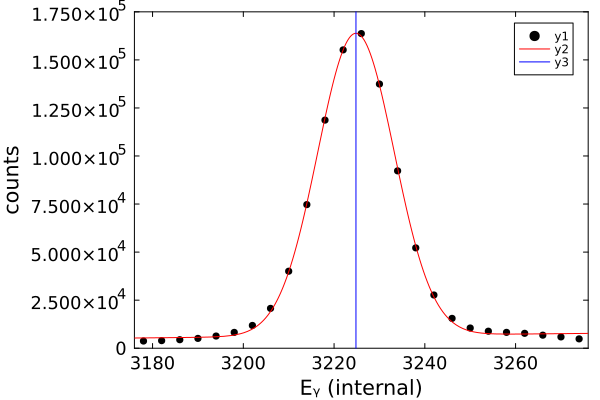

In [91]:
c2c0_p2_mean = 3226
c2c0_x1low,c2c0_x1high=c2c0_p2_mean-50,c2c0_p2_mean+50; ylow,yhigh=0,1.75e5
c2c0_param1=[100,0.05,2e5,c2c0_p2_mean,5.0]

c2c0_p2,c2c0_s2,f=PhotopeakFit.gaussianfit(kc2c0,c2c0_x1low,c2c0_x1high,c2c0_param1)

for (i,val) in enumerate(c2c0_p2)
    println("P$i = ",val,"($(c2c0_s1[i]))")
end
println("Calibrated - Expected = $(c2c0_p2[4] - kliterature[2]) keV")

scatter(kc2c0[:,1],kc2c0[:,2],xlims=(c2c0_x1low,c2c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c0_p2),c2c0_x1low,c2c0_x1high,lc=:red)
vline!([c2c0_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = -368098.8874483969(4525.559445205787)
P2 = 33.30834657636977(1.4573734042060773)
P3 = 1.3770451440226696e6(3792.8644074203767)
P4 = 11125.210670884462(0.04959763160066935)
P5 = 10.978803105767541(0.054686769762921895)
Calibrated - Expected = 9111.760670884461 keV


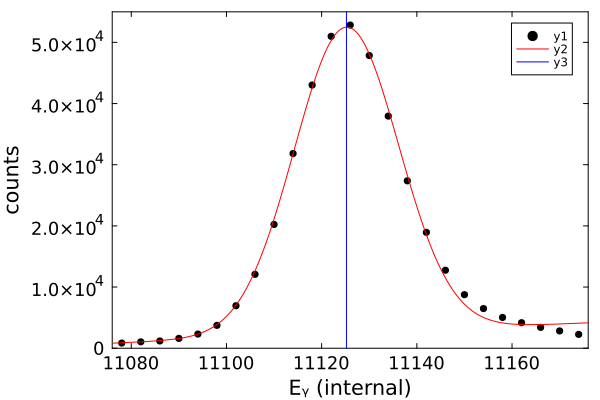

In [92]:
c2c0_p3_mean = 11126
c2c0_x1low,c2c0_x1high=c2c0_p3_mean-50,c2c0_p3_mean+50; ylow,yhigh=0,5.5e4
c2c0_param1=[100,0.05,2e5,c2c0_p3_mean,5.0]

c2c0_p3,c2c0_s3,f=PhotopeakFit.gaussianfit(kc2c0,c2c0_x1low,c2c0_x1high,c2c0_param1)

for (i,val) in enumerate(c2c0_p3)
    println("P$i = ",val,"($(c2c0_s1[i]))")
end
println("Calibrated - Expected = $(c2c0_p3[4] - kliterature[3]) keV")

scatter(kc2c0[:,1],kc2c0[:,2],xlims=(c2c0_x1low,c2c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c0_p3),c2c0_x1low,c2c0_x1high,lc=:red)
vline!([c2c0_p3[4]],lc=:blue)

## Crystal 9 (c2c1)

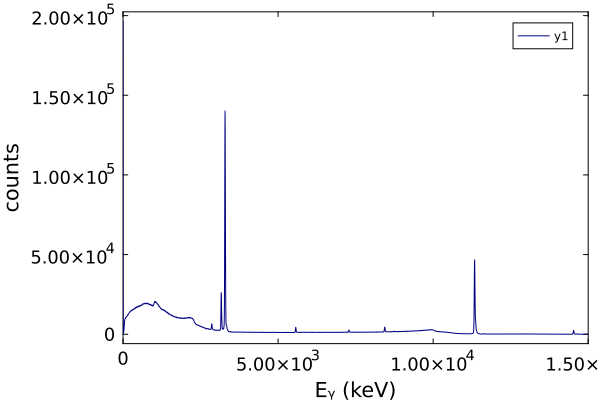

In [52]:
kc2c1 = readdlm("data/K47_T1_002_gamma_raw_ch09.txt",',') 

# Plot uncalibrated histogram
plot(kc2c1[:,1],kc2c1[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = -47325.79438483046(15996.954505758587)
P2 = 15.935260306432355(5.056268135270995)
P3 = 565088.4293333073(14786.110929219474)
P4 = 3168.1997191159685(0.21476068136232362)
P5 = 9.943092667559732(0.2413269408568535)
Calibrated - Expected = 2603.4097191159685 keV


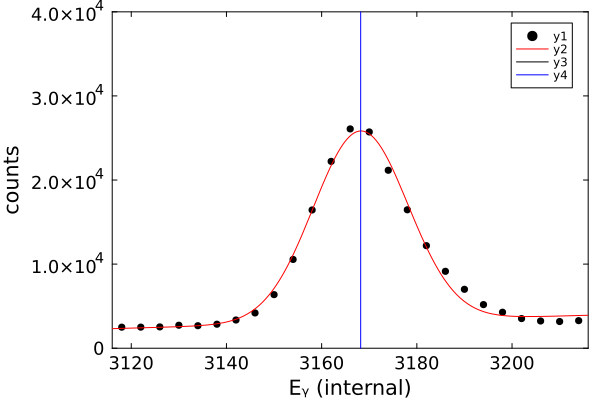

In [93]:
c2c1_p1_mean = 3166
c2c1_x1low,c2c1_x1high=c2c1_p1_mean-50,c2c1_p1_mean+50; ylow,yhigh=0,4e4
c2c1_param1=[100,0.05,2e5,c2c1_p1_mean,5.0]

c2c1_p1,c2c1_s1,f=PhotopeakFit.gaussianfit(kc2c1,c2c1_x1low,c2c1_x1high,c2c1_param1)

for (i,val) in enumerate(c2c1_p1)
    println("P$i = ",val,"($(c2c1_s1[i]))")
end
println("Calibrated - Expected = $(c2c1_p1[4] - kliterature[1]) keV")

scatter(kc2c1[:,1],kc2c1[:,2],xlims=(c2c1_x1low,c2c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c1_p1),c2c1_x1low,c2c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c2c1_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = -103221.31641374367(15996.954505758587)
P2 = 32.93958016925717(5.056268135270995)
P3 = 3.359587453844743e6(14786.110929219474)
P4 = 3290.646865130873(0.21476068136232362)
P5 = 9.993818551963297(0.2413269408568535)
Calibrated - Expected = 2704.636865130873 keV


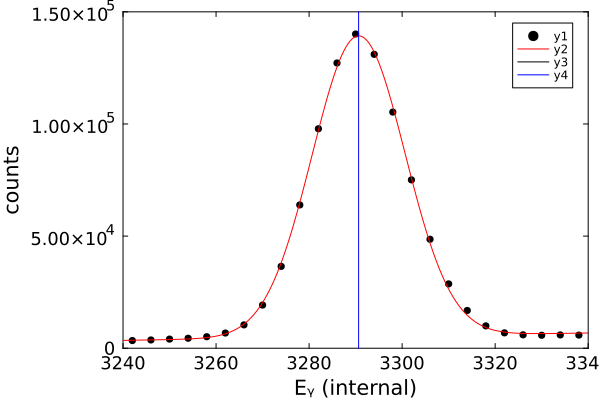

In [94]:
c2c1_p2_mean = 3290
c2c1_x1low,c2c1_x1high=c2c1_p2_mean-50,c2c1_p2_mean+50; ylow,yhigh=0,1.5e5
c2c1_param1=[100,0.05,2e5,c2c1_p2_mean,5.0]

c2c1_p2,c2c1_s2,f=PhotopeakFit.gaussianfit(kc2c1,c2c1_x1low,c2c1_x1high,c2c1_param1)

for (i,val) in enumerate(c2c1_p2)
    println("P$i = ",val,"($(c2c1_s1[i]))")
end
println("Calibrated - Expected = $(c2c1_p2[4] - kliterature[2]) keV")

scatter(kc2c1[:,1],kc2c1[:,2],xlims=(c2c1_x1low,c2c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c1_p2),c2c1_x1low,c2c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c2c1_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = -789480.2721278286(15996.954505758587)
P2 = 69.967374630921(5.056268135270995)
P3 = 1.180529031053159e6(14786.110929219474)
P4 = 11337.550860996198(0.21476068136232362)
P5 = 11.102972378212616(0.2413269408568535)
Calibrated - Expected = 9324.100860996197 keV


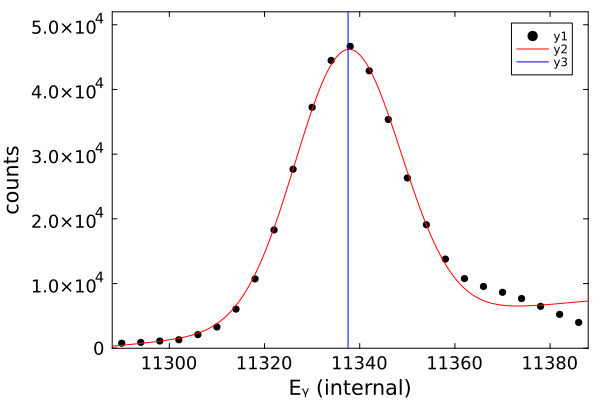

In [95]:
c2c1_p3_mean = 11338
c2c1_x1low,c2c1_x1high=c2c1_p3_mean-50,c2c1_p3_mean+50; ylow,yhigh=0,5.2e4
c2c1_param1=[100,0.05,2e5,c2c1_p3_mean,5.0]

c2c1_p3,c2c1_s3,f=PhotopeakFit.gaussianfit(kc2c1,c2c1_x1low,c2c1_x1high,c2c1_param1)

for (i,val) in enumerate(c2c1_p3)
    println("P$i = ",val,"($(c2c1_s1[i]))")
end
println("Calibrated - Expected = $(c2c1_p3[4] - kliterature[3]) keV")

scatter(kc2c1[:,1],kc2c1[:,2],xlims=(c2c1_x1low,c2c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c1_p3),c2c1_x1low,c2c1_x1high,lc=:red)
vline!([c2c1_p3[4]],lc=:blue)

## Crystal 10 (c2c2)

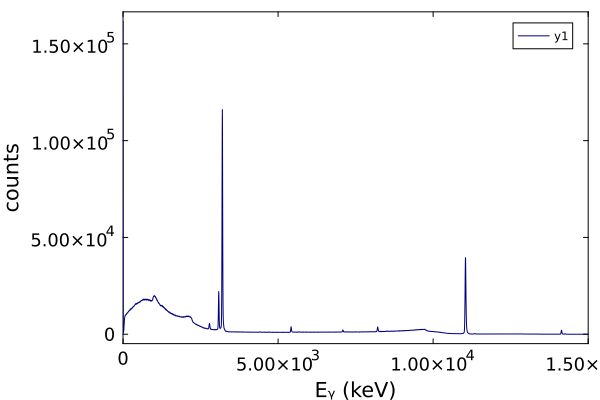

In [53]:
kc2c2 = readdlm("data/K47_T1_002_gamma_raw_ch10.txt",',') 

# Plot uncalibrated histogram
plot(kc2c2[:,1],kc2c2[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = -18412.648491974593(3562.0472443046506)
P2 = 6.899003100568779(1.1543875109288941)
P3 = 483960.85935102927(3444.5381729367577)
P4 = 3086.516752333562(0.059321792403460666)
P5 = 10.160541056574813(0.06678706520292017)
Calibrated - Expected = 2521.726752333562 keV


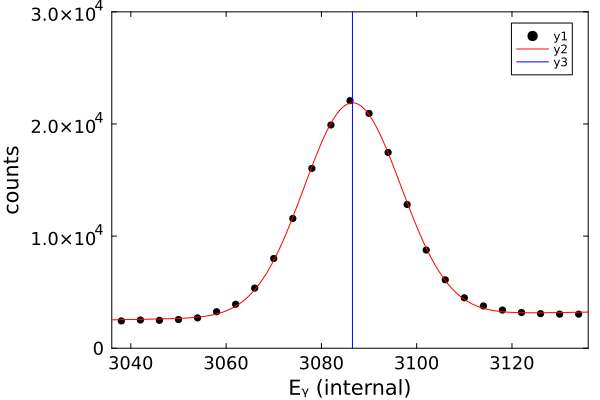

In [96]:
c2c2_p1_mean = 3086
c2c2_x1low,c2c2_x1high=c2c2_p1_mean-50,c2c2_p1_mean+50; ylow,yhigh=0,3e4
c2c2_param1=[100,0.05,2e5,c2c2_p1_mean,5.0]

c2c2_p1,c2c2_s1,f=PhotopeakFit.gaussianfit(kc2c2,c2c2_x1low,c2c2_x1high,c2c2_param1)

for (i,val) in enumerate(c2c2_p1)
    println("P$i = ",val,"($(c2c2_s1[i]))")
end
println("Calibrated - Expected = $(c2c2_p1[4] - kliterature[1]) keV")

scatter(kc2c2[:,1],kc2c2[:,2],xlims=(c2c2_x1low,c2c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c2_p1),c2c2_x1low,c2c2_x1high,lc=:red)
vline!([c2c2_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = -43039.48497490963(3562.0472443046506)
P2 = 14.981656438847764(1.1543875109288941)
P3 = 2.768075463713602e6(3444.5381729367577)
P4 = 3202.7118417784354(0.059321792403460666)
P5 = 9.980473359184968(0.06678706520292017)
Calibrated - Expected = 2616.7018417784357 keV


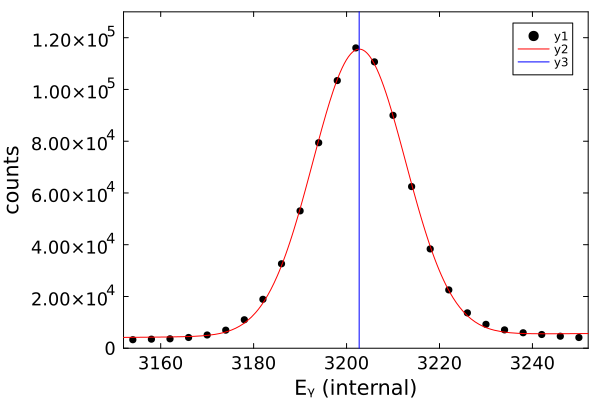

In [97]:
c2c2_p2_mean = 3202
c2c2_x1low,c2c2_x1high=c2c2_p2_mean-50,c2c2_p2_mean+50; ylow,yhigh=0,1.3e5
c2c2_param1=[100,0.05,2e5,c2c2_p2_mean,5.0]

c2c2_p2,c2c2_s2,f=PhotopeakFit.gaussianfit(kc2c2,c2c2_x1low,c2c2_x1high,c2c2_param1)

for (i,val) in enumerate(c2c2_p2)
    println("P$i = ",val,"($(c2c2_s1[i]))")
end
println("Calibrated - Expected = $(c2c2_p2[4] - kliterature[2]) keV")

scatter(kc2c2[:,1],kc2c2[:,2],xlims=(c2c2_x1low,c2c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c2_p2),c2c2_x1low,c2c2_x1high,lc=:red)
vline!([c2c2_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = -304123.25665593584(3562.0472443046506)
P2 = 27.722054873829496(1.1543875109288941)
P3 = 1.227838314401414e6(3444.5381729367577)
P4 = 11043.439456306522(0.059321792403460666)
P5 = 13.15017919771104(0.06678706520292017)
Calibrated - Expected = 9029.98945630652 keV


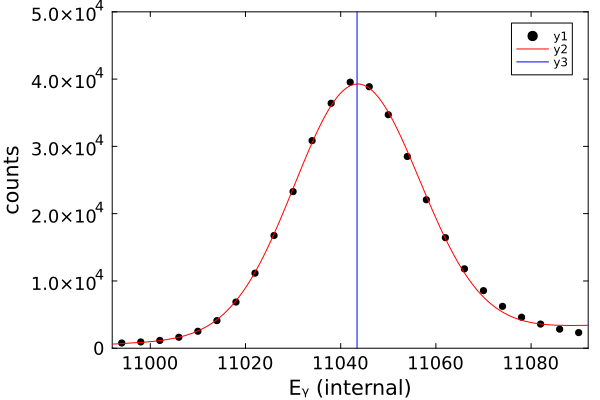

In [98]:
c2c2_p3_mean = 11042
c2c2_x1low,c2c2_x1high=c2c2_p3_mean-50,c2c2_p3_mean+50; ylow,yhigh=0,5e4
c2c2_param1=[100,0.05,2e5,c2c2_p3_mean,5.0]

c2c2_p3,c2c2_s3,f=PhotopeakFit.gaussianfit(kc2c2,c2c2_x1low,c2c2_x1high,c2c2_param1)

for (i,val) in enumerate(c2c2_p3)
    println("P$i = ",val,"($(c2c2_s1[i]))")
end
println("Calibrated - Expected = $(c2c2_p3[4] - kliterature[3]) keV")

scatter(kc2c2[:,1],kc2c2[:,2],xlims=(c2c2_x1low,c2c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c2_p3),c2c2_x1low,c2c2_x1high,lc=:red)
vline!([c2c2_p3[4]],lc=:blue)

## Crystal 11 (c2c3)

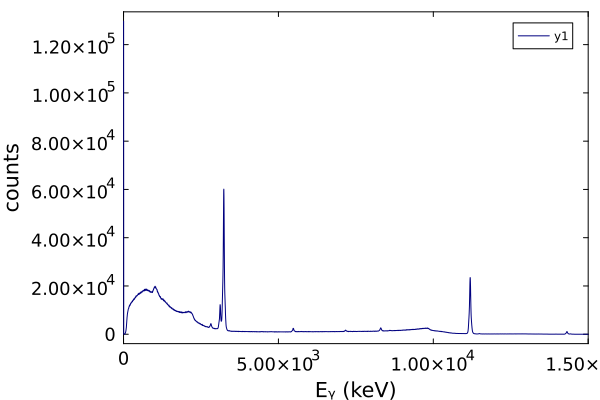

In [54]:
kc2c3 = readdlm("data/K47_T1_002_gamma_raw_ch11.txt",',') 

# Plot uncalibrated histogram
plot(kc2c3[:,1],kc2c3[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = -24994.14968490864(6495.784774184574)
P2 = 9.600795923377719(2.0851256795593422)
P3 = 242381.8453177808(8274.13770881397)
P4 = 3119.339151884475(0.3173354853800815)
P5 = 13.234421537067972(0.3797011539142991)
Calibrated - Expected = 2554.549151884475 keV


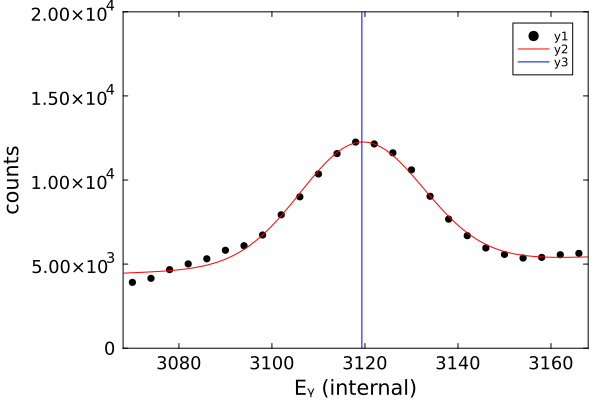

In [100]:
c2c3_p1_mean = 3118
c2c3_x1low,c2c3_x1high=c2c3_p1_mean-50,c2c3_p1_mean+50; ylow,yhigh=0,2e4
c2c3_param1=[100,0.05,2e5,c2c3_p1_mean,5.0]

c2c3_p1,c2c3_s1,f=PhotopeakFit.gaussianfit(kc2c3,c2c3_x1low,c2c3_x1high,c2c3_param1)

for (i,val) in enumerate(c2c3_p1)
    println("P$i = ",val,"($(c2c3_s1[i]))")
end
println("Calibrated - Expected = $(c2c3_p1[4] - kliterature[1]) keV")

scatter(kc2c3[:,1],kc2c3[:,2],xlims=(c2c3_x1low,c2c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c3_p1),c2c3_x1low,c2c3_x1high,lc=:red)
vline!([c2c3_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = 52801.18670352262(6495.784774184574)
P2 = -15.965689072548054(2.0851256795593422)
P3 = 3.8646734558671517e6(8274.13770881397)
P4 = 3236.6677864504654(0.3173354853800815)
P5 = 41.73280397866453(0.3797011539142991)
Calibrated - Expected = 2650.657786450465 keV


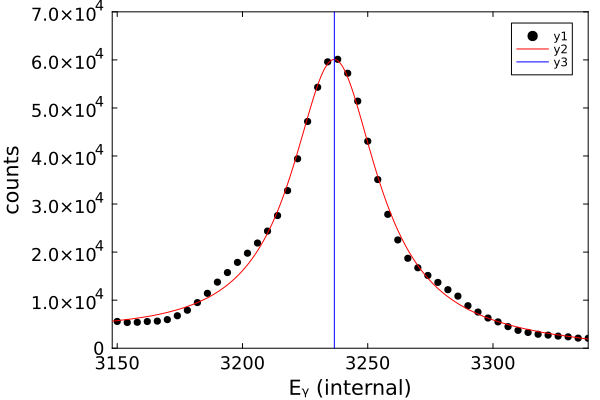

In [101]:
c2c3_p2_mean = 3238
c2c3_x1low,c2c3_x1high=c2c3_p2_mean-90,c2c3_p2_mean+100; ylow,yhigh=0,7e4
c2c3_param1=[100,0.05,2e5,c2c3_p2_mean,5.0]

c2c3_p2,c2c3_s2,f=PhotopeakFit.lorentzfit(kc2c3,c2c3_x1low,c2c3_x1high,c2c3_param1)

for (i,val) in enumerate(c2c3_p2)
    println("P$i = ",val,"($(c2c3_s1[i]))")
end
println("Calibrated - Expected = $(c2c3_p2[4] - kliterature[2]) keV")

scatter(kc2c3[:,1],kc2c3[:,2],xlims=(c2c3_x1low,c2c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c3_p2),c2c3_x1low,c2c3_x1high,lc=:red)
vline!([c2c3_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = -1340.499299608156(6495.784774184574)
P2 = 0.014835087791253239(2.0851256795593422)
P3 = 1.9677868340415875e6(8274.13770881397)
P4 = 11189.990611140041(0.3173354853800815)
P5 = 50.68588308685929(0.3797011539142991)
Calibrated - Expected = 9176.54061114004 keV


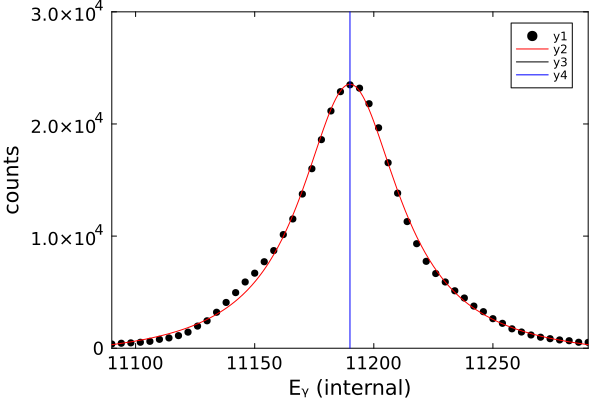

In [103]:
c2c3_p3_mean = 11190
c2c3_x1low,c2c3_x1high=c2c3_p3_mean-100,c2c3_p3_mean+100; ylow,yhigh=0,3e4
c2c3_param1=[100,0.05,2e5,c2c3_p3_mean,5.0]

c2c3_p3,c2c3_s3,f=PhotopeakFit.lorentzfit(kc2c3,c2c3_x1low,c2c3_x1high,c2c3_param1)

for (i,val) in enumerate(c2c3_p3)
    println("P$i = ",val,"($(c2c3_s1[i]))")
end
println("Calibrated - Expected = $(c2c3_p3[4] - kliterature[3]) keV")

scatter(kc2c3[:,1],kc2c3[:,2],xlims=(c2c3_x1low,c2c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c3_p3),c2c3_x1low,c2c3_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c2c3_p3[4]],lc=:blue)

## Clover 2 Areas

In [104]:
c2_areas = [(c2c0_p1[3] + c2c1_p1[3] + c2c2_p1[3] + c2c3_p1[3]), 
            (c2c0_p2[3] + c2c1_p2[3] + c2c2_p2[3] + c2c3_p2[3]), 
            (c2c0_p3[3] +c2c1_p3[3] + c2c2_p3[3] + c2c3_p3[3])]

c2_σareas = [(c2c0_s1[3]^2 + c2c1_s1[3]^2 + c2c2_s1[3]^2 + c2c3_s1[3]^2)^(1/2),
             (c2c0_s2[3]^2 + c2c1_s2[3]^2 + c2c2_s2[3]^2 + c2c3_s2[3]^2)^(1/2),
             (c2c0_s3[3]^2 + c2c1_s3[3]^2 + c2c2_s3[3]^2 + c2c3_s3[3]^2)^(1/2)]

3-element Vector{Float64}:
 17701.44329916337
 97206.85129298695
 52292.721476740684

# Asymmetry (non corrected) Calculations

## $$ \frac{N_0 - N_1}{N_0 + N_1} $$

In [109]:
asymm_01 = (c0_areas .- c1_areas) ./ (c0_areas .+ c1_areas)

3-element Vector{Float64}:
 0.759318700818801
 0.7585970757997332
 0.7477502487834667

### Errors

In [110]:
err_01 = (((c0_σareas .^ 2) .* (((2 .* c1_areas) ./ ((c0_areas .+ c1_areas) .^2)) .^ 2)) .+ ((c1_σareas .^ 2) .* (((-2 .* c0_areas) ./ ((c0_areas .+ c1_areas) .^2)) .^ 2))) .^ (0.5)

3-element Vector{Float64}:
 0.004053947595105583
 0.00398301323013932
 0.003116550584618471

### Plots

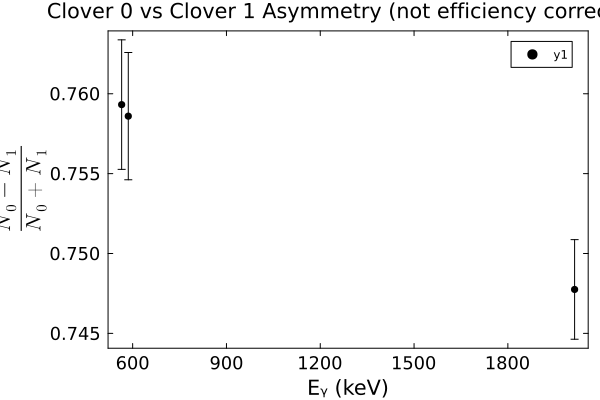

In [111]:
scatter(kliterature, asymm_01, yerr=err_01, xlabel="Eᵧ (keV)",ylabel=L"\frac{N_0 - N_1}{N_0 + N_1}")
#hline!([0])
title!("Clover 0 vs Clover 1 Asymmetry (not efficiency corrected)")

## $$ \frac{N_2 - N_1}{N_2 + N_1} $$

In [105]:
asymm_21 = (c2_areas .- c1_areas) ./ (c2_areas .+ c1_areas)

3-element Vector{Float64}:
 0.7755252386287962
 0.8151363214587206
 0.8012419365804293

### Errors

In [106]:
err_21 = (((c2_σareas .^ 2) .* (((2 .* c1_areas) ./ ((c2_areas .+ c1_areas) .^2)) .^ 2)) .+ ((c1_σareas .^ 2) .* (((-2 .* c2_areas) ./ ((c2_areas .+ c1_areas) .^2)) .^ 2))) .^ (0.5)

3-element Vector{Float64}:
 0.003833141610472646
 0.002979387440735004
 0.0025513478877731395

### Plots

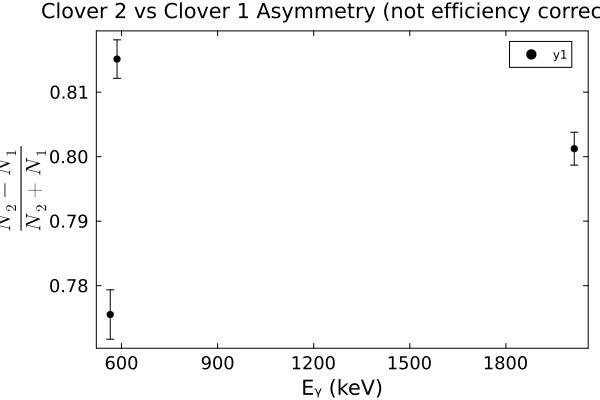

In [108]:
scatter(kliterature, asymm_21, yerr=err_21, xlabel="Eᵧ (keV)",ylabel=L"\frac{N_2 - N_1}{N_2 + N_1}")
#hline!([0])
title!("Clover 2 vs Clover 1 Asymmetry (not efficiency corrected)")